pandas
rdkit - visualizace chem struktur
seaborn
scikitlearn

database: drugbank, zinc, 
https://zinc12.docking.org/
dude.docking.org/targets    actives final sdf, decoys final 


In [80]:
import warnings
warnings.filterwarnings('ignore')

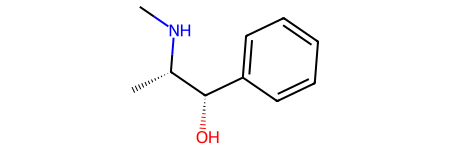

In [81]:
from rdkit import Chem

Chem.MolFromSmiles('CN[C@@H](C)[C@@H](O)C1=CC=CC=C1')


In [82]:
supp = Chem.SDMolSupplier('../data/drugbank.sdf')

In [83]:
# we will turn off the errors
Chem.SanitizeMol(m, Chem.SANITIZE_ALL ^ Chem.SANITIZE_KEKULIZE)

rdkit.Chem.rdmolops.SanitizeFlags.SANITIZE_NONE

In [84]:
mols = []
count = 0
for mol in supp:
    if mol:
        mols.append(mol)
    else:
        count += 1
print(len(mols), count)
m = mols[0]
rings = Chem.GetSSSR(m) 
print(len((rings)), [list(r) for r in rings])

[22:29:46] Explicit valence for atom # 7 N, 4, is greater than permitted
[22:29:46] ERROR: Could not sanitize molecule ending on line 20009
[22:29:46] ERROR: Explicit valence for atom # 7 N, 4, is greater than permitted
[22:29:46] Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6 7 8 9 10
[22:29:46] ERROR: Could not sanitize molecule ending on line 250947
[22:29:46] ERROR: Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6 7 8 9 10
[22:29:46] Explicit valence for atom # 17 O, 3, is greater than permitted
[22:29:46] ERROR: Could not sanitize molecule ending on line 258130
[22:29:46] ERROR: Explicit valence for atom # 17 O, 3, is greater than permitted
[22:29:46] Can't kekulize mol.  Unkekulized atoms: 57 58 59 60 61 62 63 64 65
[22:29:46] ERROR: Could not sanitize molecule ending on line 261581
[22:29:46] ERROR: Can't kekulize mol.  Unkekulized atoms: 57 58 59 60 61 62 63 64 65
[22:29:46] Can't kekulize mol.  Unkekulized atoms: 0 1 2 6 7 8 9 10 11 12 13 14 15 16 17
[22:29:46] ERROR: Coul

7117 63
6 [[12, 11, 15, 14, 13], [22, 23, 24, 25, 26, 21], [30, 29, 33, 32, 31], [76, 77, 78, 79, 80, 75], [110, 109, 113, 112, 111], [138, 139, 140, 142, 143, 137]]


[22:29:47] Explicit valence for atom # 0 C greater than permitted
[22:29:47] ERROR: Could not sanitize molecule ending on line 1151592
[22:29:47] ERROR: Explicit valence for atom # 0 C greater than permitted


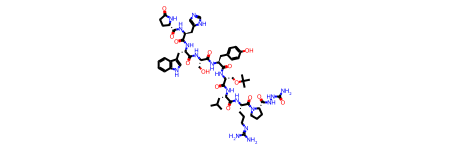

In [85]:
m = mols[1]
m


<Axes: ylabel='Count'>

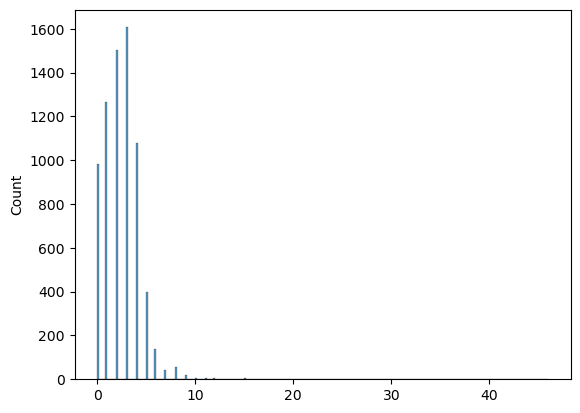

In [86]:
import seaborn as sns
rings = [len(Chem.GetSSSR(m)) for m in mols]
sns.histplot(rings)

In [87]:
sum(rings)/len(rings)

2.4701419137276943

Text(0, 0.5, 'Frequency')

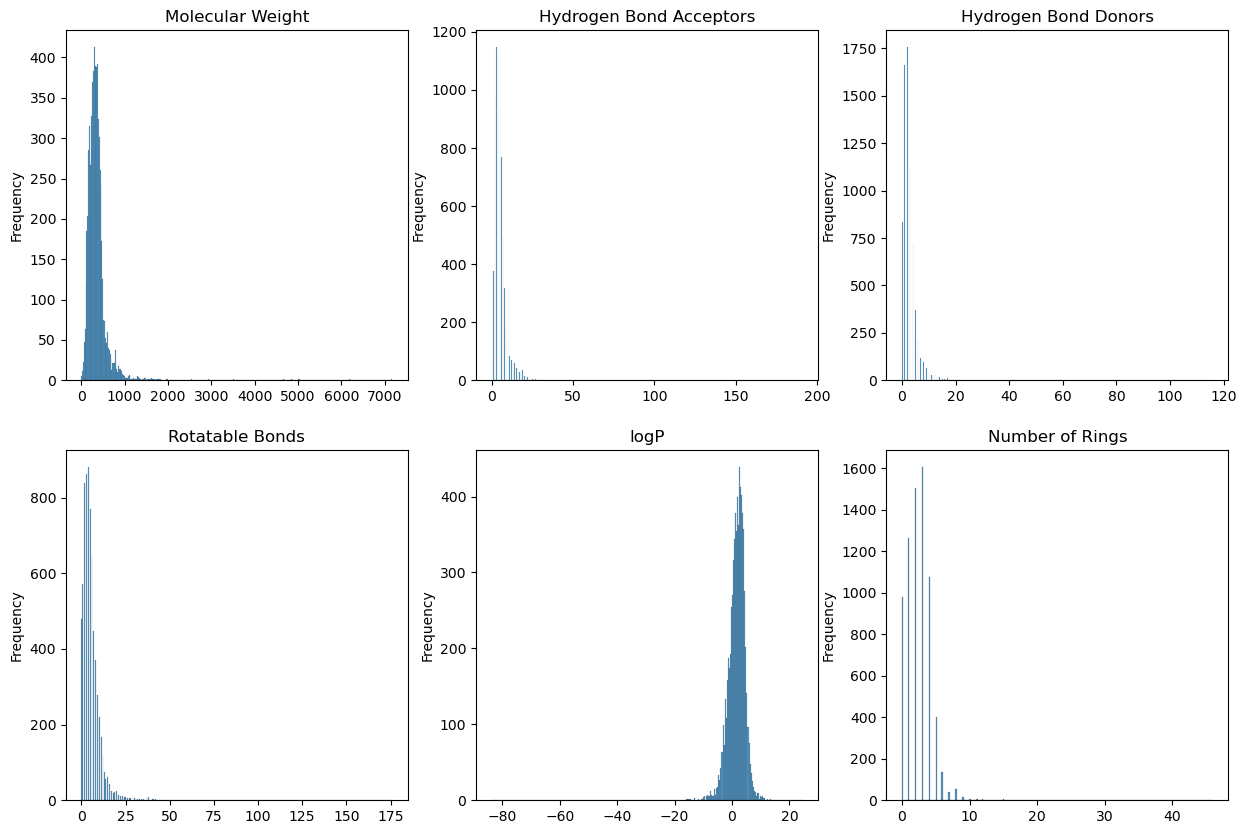

In [88]:
# plot all histogram in grid
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

sns.histplot(mol_weights, ax=axes[0, 0])
sns.histplot(hb_acceptors, ax=axes[0, 1])
sns.histplot(hb_donors, ax=axes[0, 2])
sns.histplot(rotatable_bonds, ax=axes[1, 0])
sns.histplot(logP, ax=axes[1, 1])
sns.histplot(rings, ax=axes[1, 2])

# describe the axes and title of each plot
axes[0, 0].set_title('Molecular Weight')
axes[0, 1].set_title('Hydrogen Bond Acceptors')
axes[0, 2].set_title('Hydrogen Bond Donors')
axes[1, 0].set_title('Rotatable Bonds')
axes[1, 1].set_title('logP')
axes[1, 2].set_title('Number of Rings')

# describe the y-axis of each plot
axes[0, 0].set_ylabel('Frequency')
axes[0, 1].set_ylabel('Frequency')
axes[0, 2].set_ylabel('Frequency')
axes[1, 0].set_ylabel('Frequency')
axes[1, 1].set_ylabel('Frequency')
axes[1, 2].set_ylabel('Frequency')

Text(0.5, 1.0, 'Number of Rings')

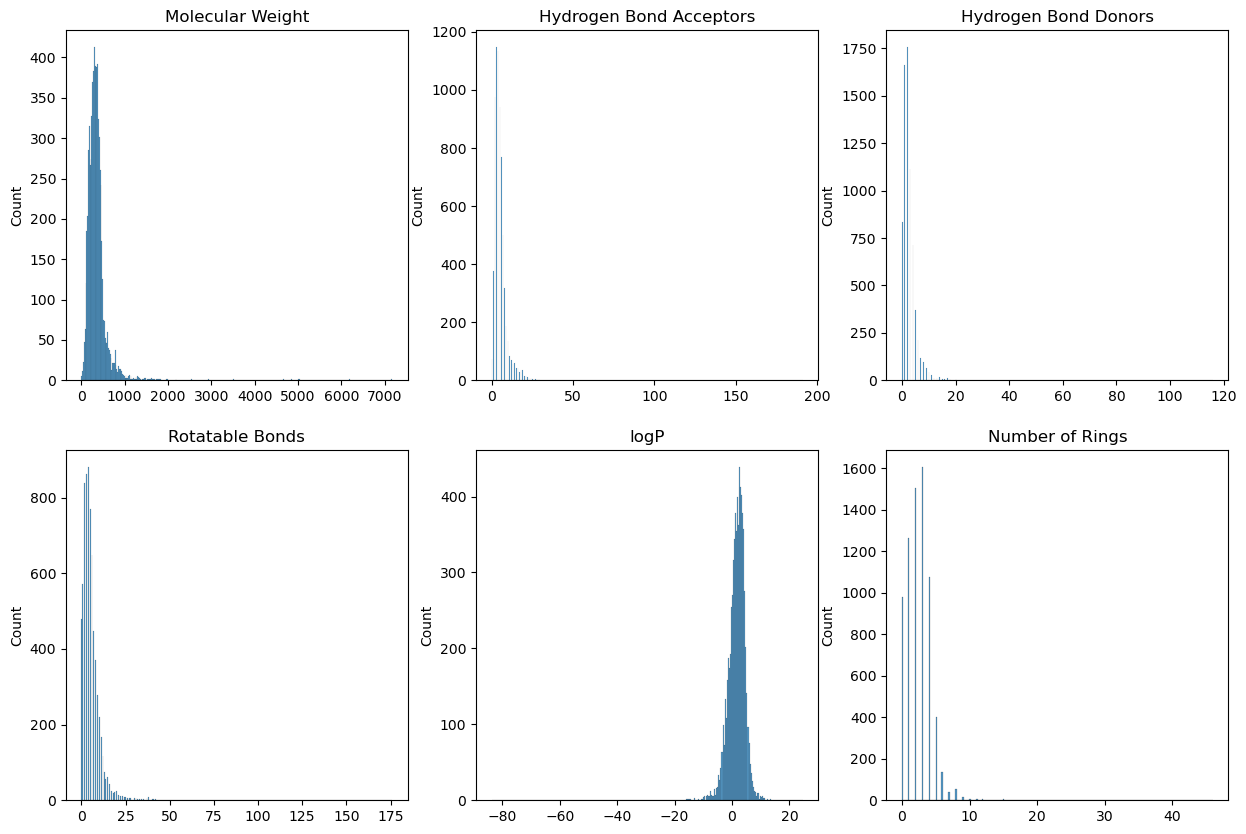

In [91]:
# import lipinki descriptors
from rdkit.Chem import Lipinski

# Mol weight, hydrogen bond acceptrs/donors, rotatable bonds, logP, and number of rings
# create histograms for each of these

# histogram for mol weights
mol_weights = [Chem.Descriptors.ExactMolWt(m) for m in mols]

# hist for hb acceptors
hb_acceptors = [Lipinski.NumHAcceptors(m) for m in mols]

# hist for hb donors
hb_donors = [Lipinski.NumHDonors(m) for m in mols]

# hist for rotatable bonds
rotatable_bonds = [Lipinski.NumRotatableBonds(m) for m in mols]

# hist for logP
logP = [Chem.Descriptors.MolLogP(m) for m in mols]

# hist for number of rings
rings = [Lipinski.RingCount(m) for m in mols]

# plot all histogram in grid

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

sns.histplot(mol_weights, ax=axes[0, 0])
sns.histplot(hb_acceptors, ax=axes[0, 1])
sns.histplot(hb_donors, ax=axes[0, 2])
sns.histplot(rotatable_bonds, ax=axes[1, 0])
sns.histplot(logP, ax=axes[1, 1])
sns.histplot(rings, ax=axes[1, 2])

# describe the axes and title of each plot
axes[0, 0].set_title('Molecular Weight')
axes[0, 1].set_title('Hydrogen Bond Acceptors')
axes[0, 2].set_title('Hydrogen Bond Donors')
axes[1, 0].set_title('Rotatable Bonds')
axes[1, 1].set_title('logP')
axes[1, 2].set_title('Number of Rings')



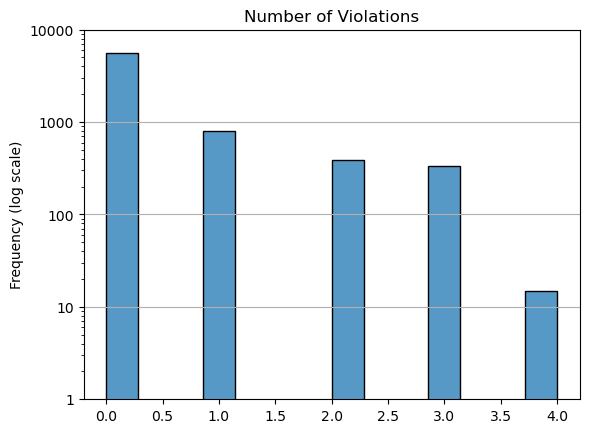

In [115]:
# create Lipinski filter function to filter out molecules that fail the Lipinski rule of 5
# MW < 500, HBA < 10, HBD < 5, RB < 10, logP < 5
# for each molecule will have an integer value of number of violations
# if the value is 0, then the molecule passes the filter
'''
sns.histplot(mol_weights, ax=axes[0, 0])
sns.histplot(hb_acceptors, ax=axes[0, 1])
sns.histplot(hb_donors, ax=axes[0, 2])
sns.histplot(rotatable_bonds, ax=axes[1, 0])
sns.histplot(logP, ax=axes[1, 1])
sns.histplot(rings, ax=axes[1, 2])
'''
# MW =< 500, HBA =< 10, HBD =< 5, logP < 50
mw = mol_weights
hba = hb_acceptors
hbd = hb_donors
logp = logP

# create filter function and store number of violations for each molecule
def filter(mw, hba, hbd, logp):
    violations = []
    for i in range(len(mw)):
        violation = 0
        if mw[i] > 500:
            violation += 1
        if hba[i] > 10:
            violation += 1
        if hbd[i] > 5:
            violation += 1
        if logp[i] > 5:
            violation += 1
        violations.append(violation)
    return violations

# create list of violations
violations = filter(mw, hba, hbd, logp)

# histogram of violations
sns.histplot(violations)

# name of plot
plt.title('Number of Violations')

# name of y-axis in log scale
plt.ylabel('Frequency (log scale)')

# log scale for y-axis
plt.yscale('log')
plt.ylim(1, 10000)

# Y-axis index
plt.yticks([1, 10, 100, 1000, 10000], [1, 10, 100, 1000, 10000])

# grid lines for histogram bin edges and histogram bars
plt.grid(axis='y')
